### SENTIMENT ANALYSIS ON MOVIEW REVIEW

#### Importing Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
import re
import string

#### Loading IMDB dataset

In [73]:
num_words = 5000  # only keep the top 20000 , most frequently occuring words

In [75]:
(X_test, Y_test) , (X_train, Y_train) =  imdb.load_data(num_words = num_words)  

In [76]:
# Get the word index
word_index = imdb.get_word_index()

In [77]:
# Reverse word index to get words from indices
reverse_word_index = {value: key for (key, value) in word_index.items()}

In [78]:
# Decode reviews back to text
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i-3, '?') for i in encoded_review])

In [79]:
# Convert to text data
train_text = [decode_review(review) for review in X_train]
test_text = [decode_review(review) for review in X_test]

#### Text Preprocessing

In [80]:
def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r"<.*?>", "", text)  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    text = re.sub(r"\d+", "", text)  
    text = re.sub(r"\s+", " ", text).strip()  
    return text

train_text_clean = [preprocess_text(review) for review in train_text]
test_text_clean = [preprocess_text(review) for review in test_text]

#### TF-IDF Vectorization

In [87]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(train_text_clean)
X_test_tfidf = tfidf.transform(test_text_clean)

#### Feature Extraction & Analysis

##### Top TF-IDF Words

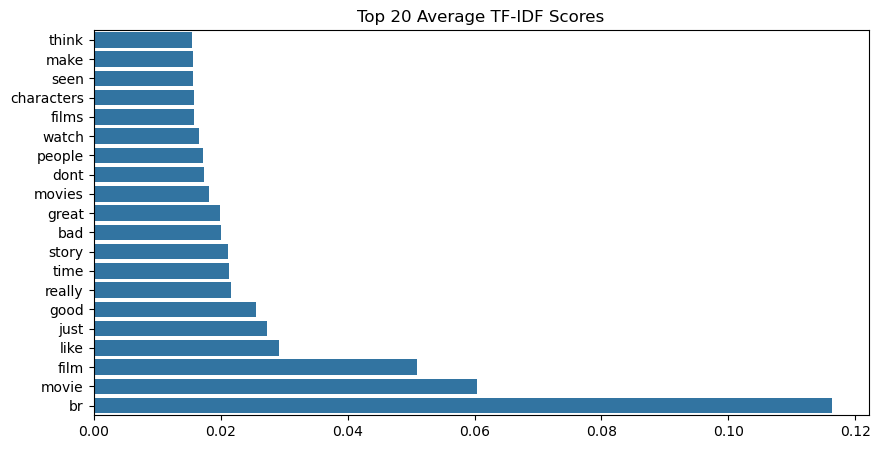

In [91]:
feature_names = np.array(tfidf.get_feature_names_out())
top_n = 20
tfidf_means = np.asarray(X_train_tfidf.mean(axis=0)).ravel()
top_features_idx = np.argsort(tfidf_means)[-top_n:]

# Visualizing top words
plt.figure(figsize=(10,5))
sns.barplot(x=tfidf_means[top_features_idx], y=feature_names[top_features_idx])
plt.title("Top 20 Average TF-IDF Scores")
plt.show()

##### WordCloud for Positive and Negative Reviews

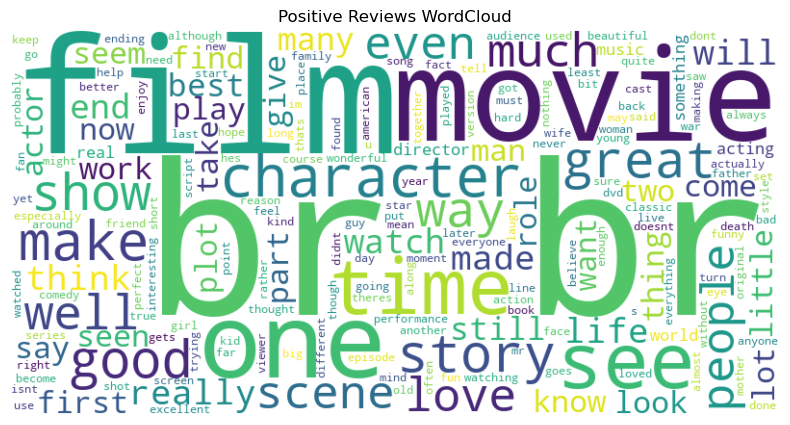

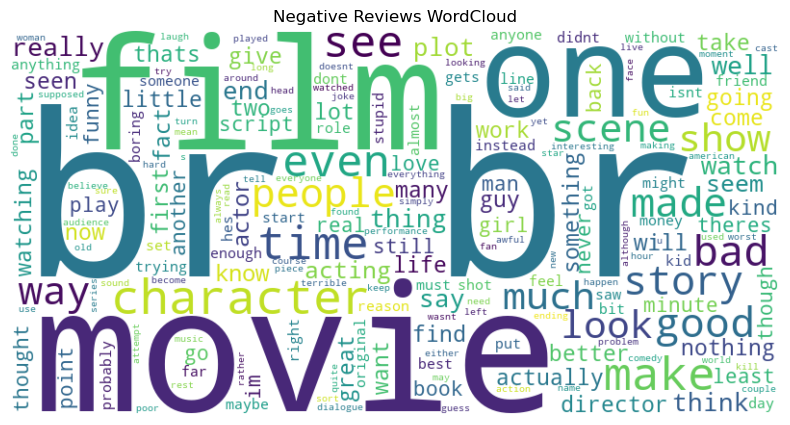

In [94]:
positive_reviews = ' '.join([train_text_clean[i] for i in range(len(y_train)) if y_train[i] == 1])
negative_reviews = ' '.join([train_text_clean[i] for i in range(len(y_train)) if y_train[i] == 0])

# WordCloud Positive
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")
plt.show()

# WordCloud Negative
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")
plt.show()

##### AI Algorithm: SVM

In [104]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

#### Model Evaluation 

Accuracy Score: 0.85796

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86     12500
           1       0.87      0.85      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



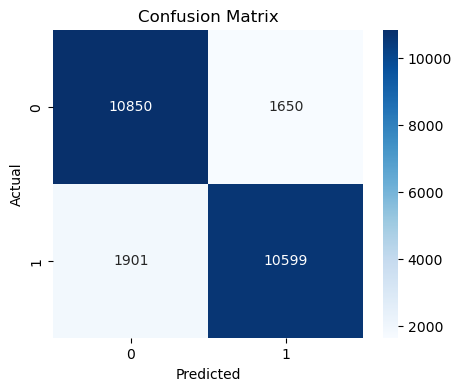

In [108]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()